In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [13]:
df=pd.read_csv('file:///F:/Rainfall_Data_LL.csv')
df.head()

,Name,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,June-September,Oct-Dec,Latitude,Longitude
0,ROW1,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,...,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,12.61124,92.83165
1,ROW2,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,...,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,12.61124,92.83165
2,ROW3,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,...,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,12.61124,92.83165
3,ROW4,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,...,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,12.61124,92.83165
4,ROW5,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,...,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,12.61124,92.83165


In [14]:
df.shape

(4187, 22)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4187 entries, 0 to 4186
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            4187 non-null   object 
 1   SUBDIVISION     4187 non-null   object 
 2   YEAR            4187 non-null   int64  
 3   JAN             4187 non-null   float64
 4   FEB             4187 non-null   float64
 5   MAR             4187 non-null   float64
 6   APR             4187 non-null   float64
 7   MAY             4187 non-null   float64
 8   JUN             4187 non-null   float64
 9   JUL             4187 non-null   float64
 10  AUG             4187 non-null   float64
 11  SEP             4187 non-null   float64
 12  OCT             4187 non-null   float64
 13  NOV             4187 non-null   float64
 14  DEC             4187 non-null   float64
 15  ANNUAL          4187 non-null   float64
 16  Jan-Feb         4187 non-null   float64
 17  Mar-May         4187 non-null   f

In [16]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,June-September,Oct-Dec,Latitude,Longitude
count,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000,4187.000000
mean,1959.206831,18.937772,21.604374,27.395503,43.081712,85.646511,230.047704,347.063780,289.762156,197.311863,95.314713,39.490685,18.934858,1414.591631,40.542146,156.123726,1064.185504,153.740255,21.912044,79.909447
std,33.709294,33.780997,35.721764,46.886429,68.123572,122.662312,234.136680,268.643091,188.354112,135.466361,99.121632,68.275998,42.952083,905.706627,59.271964,201.297829,706.413643,166.854827,6.365097,6.235477
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.200000,0.000000,0.000000,57.400000,0.000000,10.160618,70.568914
25%,1930.000000,0.600000,0.500000,1.000000,3.000000,8.650000,70.850000,176.050000,155.950000,100.400000,14.600000,0.600000,0.100000,804.950000,4.000000,24.200000,574.150000,34.150000,17.538193,75.061520
50%,1959.000000,6.000000,6.500000,7.900000,15.500000,36.900000,138.900000,285.300000,258.900000,173.900000,65.700000,9.400000,3.100000,1123.300000,19.000000,75.100000,881.200000,98.300000,23.059981,78.026702
75%,1988.000000,22.000000,26.600000,31.300000,49.550000,97.500000,303.850000,418.400000,377.550000,265.850000,148.100000,45.000000,17.650000,1650.300000,50.200000,197.600000,1287.450000,211.550000,26.599363,82.868991
max,2017.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4537.000000,1252.500000,33.557450,94.592130


In [17]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,20.0,0.039952,0.226818,-0.054902,-0.016044,-0.009557,0.005002,1.0
JAN,20.0,0.202226,0.285566,-0.054902,0.012421,0.106020,0.251208,1.0
FEB,20.0,0.250667,0.293171,-0.031058,0.031383,0.158167,0.389640,1.0
MAR,20.0,0.310139,0.255614,0.009119,0.123139,0.251875,0.434996,1.0
APR,20.0,0.398686,0.250068,0.006592,0.243864,0.368530,0.561131,1.0
MAY,20.0,0.425015,0.281650,-0.126544,0.236965,0.428068,0.575805,1.0
JUN,20.0,0.384985,0.356832,-0.294150,0.076060,0.429805,0.588200,1.0
JUL,20.0,0.305409,0.353408,-0.165874,0.008146,0.227425,0.556965,1.0
AUG,20.0,0.314816,0.319061,-0.053523,0.042310,0.254009,0.536985,1.0
SEP,20.0,0.352488,0.288523,-0.128920,0.106839,0.384886,0.517454,1.0


In [18]:
df.min()

Name                                   ROW1
SUBDIVISION       Andaman & Nicobar Islands
YEAR                                   1901
JAN                                     0.0
FEB                                     0.0
MAR                                     0.0
APR                                     0.0
MAY                                     0.0
JUN                                     0.4
JUL                                     0.0
AUG                                     0.0
SEP                                     0.1
OCT                                     0.0
NOV                                     0.0
DEC                                     0.0
ANNUAL                                 62.2
Jan-Feb                                 0.0
Mar-May                                 0.0
June-September                         57.4
Oct-Dec                                 0.0
Latitude                          10.160618
Longitude                         70.568914
dtype: object

In [19]:
df.max()

Name                          ROW999
SUBDIVISION       West Uttar Pradesh
YEAR                            2017
JAN                            583.7
FEB                            403.5
MAR                            605.6
APR                            595.1
MAY                           1168.6
JUN                           1609.9
JUL                           2362.8
AUG                           1664.6
SEP                           1222.0
OCT                            948.3
NOV                            648.9
DEC                            617.5
ANNUAL                        6331.1
Jan-Feb                        699.5
Mar-May                       1745.8
June-September                4537.0
Oct-Dec                       1252.5
Latitude                    33.55745
Longitude                   94.59213
dtype: object

In [20]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


YEAR              1959.206831
JAN                 18.937772
FEB                 21.604374
MAR                 27.395503
APR                 43.081712
MAY                 85.646511
JUN                230.047704
JUL                347.063780
AUG                289.762156
SEP                197.311863
OCT                 95.314713
NOV                 39.490685
DEC                 18.934858
ANNUAL            1414.591631
Jan-Feb             40.542146
Mar-May            156.123726
June-September    1064.185504
Oct-Dec            153.740255
Latitude            21.912044
Longitude           79.909447
dtype: float64

In [21]:
df=df.fillna(0)

In [22]:
df.head()

,Name,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,June-September,Oct-Dec,Latitude,Longitude
0,ROW1,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,...,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,12.61124,92.83165
1,ROW2,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,...,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,12.61124,92.83165
2,ROW3,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,...,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,12.61124,92.83165
3,ROW4,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,...,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,12.61124,92.83165
4,ROW5,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,...,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,12.61124,92.83165


In [24]:
df=df.drop(['Name'],axis='columns')

In [25]:
df.dtypes

SUBDIVISION        object
YEAR                int64
JAN               float64
FEB               float64
MAR               float64
APR               float64
MAY               float64
JUN               float64
JUL               float64
AUG               float64
SEP               float64
OCT               float64
NOV               float64
DEC               float64
ANNUAL            float64
Jan-Feb           float64
Mar-May           float64
June-September    float64
Oct-Dec           float64
Latitude          float64
Longitude         float64
dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder

In [29]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,June-September,Oct-Dec,Latitude,Longitude
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,...,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,12.61124,92.83165
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,...,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,12.61124,92.83165
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,...,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,12.61124,92.83165
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,...,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,12.61124,92.83165
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,...,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,12.61124,92.83165


In [27]:
le=LabelEncoder()

In [33]:
x=df.drop(['SUBDIVISION'],axis='columns')

In [34]:
y=df.SUBDIVISION.values

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [36]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest , pred_tre)*100
accu_tre

100.0

In [37]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        42
           8       1.00      1.00      1.00        33
           9       1.00      1.00      1.00        29
          10       1.00      1.00      1.00        33
          11       1.00      1.00      1.00        41
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        38
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        39
          16       1.00      1.00      1.00        27
          17       1.00    

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest , pred_tre)*100
accu_kne

100.0

In [42]:
print(classification_report(ytest,pred_kne))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81        42
           1       0.80      0.59      0.68        34
           2       0.52      0.62      0.57        45
           3       0.13      0.35      0.19        34
           4       0.26      0.47      0.34        36
           5       0.41      0.62      0.49        34
           6       0.66      0.70      0.68        33
           7       0.27      0.21      0.24        42
           8       0.26      0.45      0.33        33
           9       0.14      0.21      0.17        29
          10       0.33      0.36      0.35        33
          11       0.26      0.15      0.19        41
          12       0.21      0.25      0.23        32
          13       0.70      0.50      0.58        38
          14       0.80      0.80      0.80        30
          15       0.19      0.13      0.15        39
          16       0.77      0.63      0.69        27
          17       0.66    

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [46]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest , pred_ada)*100
accu_ada

36.27684964200477

In [47]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        34
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        36
           5       0.00      0.00      0.00        34
           6       0.00      0.00      0.00        33
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00        33
           9       0.04      1.00      0.07        29
          10       0.00      0.00      0.00        33
          11       1.00      1.00      1.00        41
          12       0.00      0.00      0.00        32
          13       1.00      1.00      1.00        38
          14       1.00      1.00      1.00        30
          15       0.00      0.00      0.00        39
          16       1.00      1.00      1.00        27
          17       0.31    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.ensemble import BaggingClassifier

In [49]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest , pred_bag)*100
accu_bag

100.0

In [50]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        42
           8       1.00      1.00      1.00        33
           9       1.00      1.00      1.00        29
          10       1.00      1.00      1.00        33
          11       1.00      1.00      1.00        41
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        38
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        39
          16       1.00      1.00      1.00        27
          17       1.00    

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pre_gau)*100
accu_l

100.0

In [53]:
print(classification_report(ytest,pre_gau))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        42
           8       1.00      1.00      1.00        33
           9       1.00      1.00      1.00        29
          10       1.00      1.00      1.00        33
          11       1.00      1.00      1.00        41
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        38
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        39
          16       1.00      1.00      1.00        27
          17       1.00    

In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
ada=AdaBoostClassifier()
#rdf=RandomForestClassifier()
ada.fit(xtrain,ytrain)
pre_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pre_ada)*100
accu_ada

33.969769291964994

In [56]:
print(classification_report(ytest,pre_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        34
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        36
           5       0.00      0.00      0.00        34
           6       0.00      0.00      0.00        33
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00        29
          10       0.00      0.00      0.00        33
          11       1.00      1.00      1.00        41
          12       0.00      0.00      0.00        32
          13       1.00      1.00      1.00        38
          14       1.00      1.00      1.00        30
          15       0.00      0.00      0.00        39
          16       1.00      1.00      1.00        27
          17       0.03    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from sklearn.ensemble import ExtraTreesClassifier

In [58]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

100.0

In [59]:
print(classification_report(ytest,pre_etc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        42
           8       1.00      1.00      1.00        33
           9       1.00      1.00      1.00        29
          10       1.00      1.00      1.00        33
          11       1.00      1.00      1.00        41
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        38
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        39
          16       1.00      1.00      1.00        27
          17       1.00    

In [62]:
from sklearn.svm import SVC

In [67]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_siv=svc.predict(xtest)
accu_siv=accuracy_score(ytest,pre_siv)*100
accu_siv

40.89101034208433

In [64]:
print(classification_report(ytest,pre_siv))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        42
           1       1.00      0.50      0.67        34
           2       0.56      0.53      0.55        45
           3       0.16      0.29      0.21        34
           4       0.27      0.44      0.34        36
           5       0.31      0.50      0.39        34
           6       0.75      0.73      0.74        33
           7       0.00      0.00      0.00        42
           8       0.25      0.48      0.33        33
           9       0.13      0.28      0.17        29
          10       0.27      0.09      0.14        33
          11       0.00      0.00      0.00        41
          12       0.22      0.47      0.30        32
          13       0.67      0.37      0.47        38
          14       0.65      0.80      0.72        30
          15       0.00      0.00      0.00        39
          16       0.76      0.70      0.73        27
          17       0.72    

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
models = pd.DataFrame({
    'Model': ['DecisionTreeClassifier','RandomForestClassifier',  'KNeighborsClassifier',
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','AdaBoostClassifier','GradientBoostingClassifier','ExtraTreesClassifier','SVM'],
    'Score': [ accu_tre,accu_l, accu_kne, accu_ada,accu_bag,accu_l,accu_l,accu_ada,accu_etc,accu_siv]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,DecisionTreeClassifier,100.000000
2,KNeighborsClassifier,100.000000
4,BaggingClassifier,100.000000
8,ExtraTreesClassifier,100.000000
1,RandomForestClassifier,40.891010
5,GaussianNB,40.891010
6,AdaBoostClassifier,40.891010
9,SVM,40.891010
3,AdaBoostClassifier,33.969769
7,GradientBoostingClassifier,33.969769


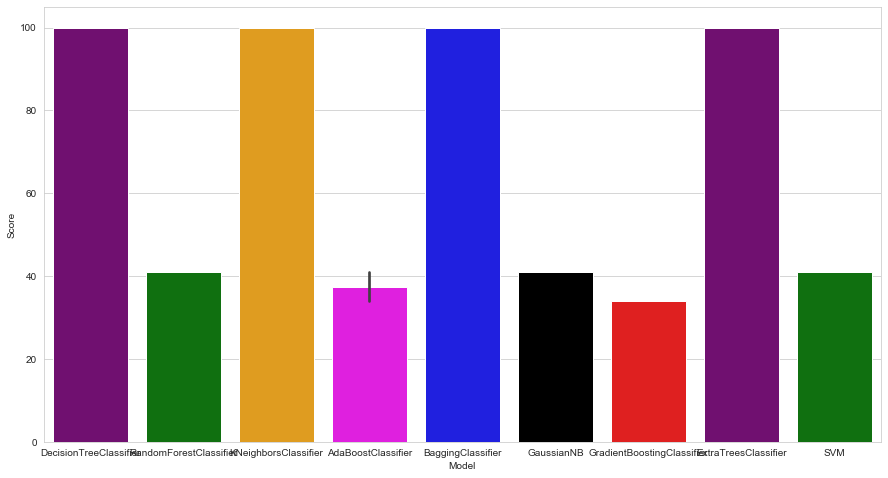

In [69]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [70]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,June-September,Oct-Dec,Latitude,Longitude
0,0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,...,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,12.61124,92.83165
1,0,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,...,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,12.61124,92.83165
2,0,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,...,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,12.61124,92.83165
3,0,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,...,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,12.61124,92.83165
4,0,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,...,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,12.61124,92.83165


In [72]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'June-September', 'Oct-Dec', 'Latitude', 'Longitude'],
      dtype='object')

In [73]:
import sklearn.cluster as cluster

In [74]:
kmns=cluster.KMeans(n_clusters=5)

In [76]:
kmns=kmns.fit(df[['YEAR','JAN']])

In [77]:
kmns.cluster_centers_

array([[1920.96219136,   10.58408607],
       [1961.24052718,    8.80769174],
       [1951.38297872,   82.83085106],
       [1999.1368    ,   10.56419022],
       [1961.66666667,  206.53529412]])

In [78]:
from sklearn.cluster import KMeans 

In [84]:
k_range=range(1,12)
wss=[]

In [85]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['YEAR','JAN']])
    wss.append(km.inertia_)

In [86]:
wss

[9533498.796677366,
 5917830.787981566,
 3194787.531615016,
 2571362.3862770842,
 1984491.9743578795,
 1686770.604369891,
 1394377.1723725805,
 1201911.6115074155,
 1061844.45761796,
 967236.8531933079,
 874678.9799369479]

In [87]:
kmns=cluster.KMeans(n_clusters=5)

In [88]:
kmns=kmns.fit(df[['YEAR','FEB']])

In [89]:
kmns.cluster_centers_

array([[1998.23802042,   11.48798458],
       [1919.42819149,   10.09973792],
       [1959.12701101,    7.57079117],
       [1962.1595092 ,  152.97239264],
       [1947.43438914,   69.1520362 ]])

In [91]:
k_range=range(1,15)
wss=[]

In [95]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['YEAR','FEB']])
    wss.append(km.inertia_)

In [96]:
wss

[10098142.954602312,
 6457164.681336597,
 3245665.5046129776,
 2580265.1366977887,
 1986805.5372548092,
 1600906.9498219576,
 1370874.5561793356,
 1203047.449883672,
 1043308.8065633837,
 946531.2713741884,
 870359.9205258064,
 784432.7528958677,
 710958.5170610785,
 665789.0849225379]

In [97]:
kmns=cluster.KMeans(n_clusters=5)

In [98]:
kmns=kmns.fit(df[['YEAR','MAR']])

In [99]:
kmns.cluster_centers_

array([[1998.78275862,   11.79017241],
       [1920.46822204,   12.64302656],
       [1959.98532495,   98.61865828],
       [1960.12174643,   10.6585147 ],
       [1965.95689655,  220.49741379]])

In [100]:
k_range=range(1,12)
wss=[]

In [101]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['YEAR','MAR']])
    wss.append(km.inertia_)

In [102]:
wss

[13958860.660108142,
 7609097.3378372025,
 4431659.930222274,
 3209801.771812981,
 2638351.9388970435,
 2198279.098716608,
 1828975.5076392016,
 1618528.0232682799,
 1446227.7054837511,
 1272815.7425830096,
 1156994.523456501]

In [103]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['YEAR','APR']])
kmns.cluster_centers_

array([[1988.60211049,   13.34047176],
       [1957.87279152,   79.75530035],
       [1928.7816092 ,   13.74011931],
       [1958.61403509,  320.59824561],
       [1962.57878788,  168.74212121]])

In [105]:
k_range=range(1,12)
wss=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['YEAR','MAY']])
    wss.append(km.inertia_)
    

In [106]:
wss

[67739356.19369647,
 21257725.927088093,
 13736490.864277968,
 10161275.061895773,
 7724739.337617651,
 6114336.999532556,
 5095829.939330224,
 4368987.013716538,
 3878580.86428175,
 3510355.2758808285,
 3174164.7648054385]

In [108]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['YEAR','JUN']])
kmns.cluster_centers_

array([[1958.01349164,   64.99881274],
       [1955.11578947,  935.45473684],
       [1961.72466539,  370.96424474],
       [1961.40200167,  180.75974856],
       [1956.93127962,  602.57180095]])

In [109]:
k_range=range(1,12)
wss=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['YEAR','JUN']])
    wss.append(km.inertia_)

In [110]:
wss

[234233077.47760564,
 65487505.61561335,
 35734155.78344818,
 23470870.88336422,
 17326511.152607825,
 13414391.62342762,
 11197191.385297962,
 9905666.252546465,
 8737943.087727144,
 7762972.5835,
 6985362.661599605]

In [111]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['YEAR','JUL']])
kmns.cluster_centers_

array([[1959.07809111,  130.80788142],
       [1958.02836879,  797.57695035],
       [1958.29930394,  465.55510441],
       [1957.14110429, 1281.76319018],
       [1960.29525718,  291.98139376]])

In [112]:
k_range=range(1,12)
wss=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['YEAR','JUL']])
    wss.append(km.inertia_)

In [113]:
wss

[306856516.0609205,
 110531216.97051513,
 56138871.23540676,
 36335355.22110728,
 25886147.783761714,
 19985171.03692028,
 16168347.331601363,
 14087063.38893673,
 12181788.194674494,
 10878423.624183208,
 9939018.437996374]

In [114]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['YEAR','AUG']])
kmns.cluster_centers_

array([[1957.7317257 ,  113.65177091],
       [1958.41148325,  394.55818182],
       [1962.85981308,  976.58130841],
       [1961.8998538 ,  251.56984549],
       [1955.42352941,  592.53882353]])

In [116]:
k_range=range(1,12)
wss=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['YEAR','AUG']])
    wss.append(km.inertia_)

In [117]:
wss

[153264479.50399268,
 67518105.40920174,
 35050026.2879886,
 23146634.79121701,
 16972902.41033022,
 13705281.578637164,
 11511406.265239764,
 9833158.377661522,
 8723913.111208467,
 7869432.607805949,
 7092593.332720208]

In [124]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['YEAR','SEP']])
kmns.cluster_centers_

array([[1960.43846154,  388.80846154],
       [1959.35097002,   58.55555556],
       [1957.3115942 ,  610.34275362],
       [1959.65131579,  154.29763975],
       [1958.08666018,  255.36114898]])

In [125]:
k_range=range(1,12)
wss=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['YEAR','SEP']])
    wss.append(km.inertia_)

In [126]:
wss

[81574471.6962287,
 33757651.84138833,
 19745935.04117199,
 14010544.520245435,
 11135235.691619162,
 9246261.34305847,
 8017056.050666667,
 7027153.635522965,
 6197629.252387265,
 5538709.644132176,
 4884215.51587986]

In [120]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'June-September', 'Oct-Dec', 'Latitude', 'Longitude'],
      dtype='object')

In [127]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['YEAR','OCT']])
kmns.cluster_centers_

array([[1988.75799481,   25.15393258],
       [1960.55589587,  216.10107198],
       [1958.7714808 ,  115.92376873],
       [1956.39810427,  368.77345972],
       [1927.48787313,   22.60615672]])

In [128]:
k_range=range(1,12)
wss=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['YEAR','OCT']])
    wss.append(km.inertia_)

In [129]:
wss

[45884480.44979845,
 17976806.38744408,
 11151557.182309091,
 8648882.441563219,
 6659795.00918957,
 5515373.180972154,
 4696013.819196849,
 4107967.0831305827,
 3602934.0871914793,
 3228269.8351550284,
 2942936.8053328968]

In [131]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['YEAR','NOV']])
kmns.cluster_centers_

array([[1988.93168077,   11.03124629],
       [1957.01788909,   85.4470483 ],
       [1929.68110483,    9.73290406],
       [1956.61870504,  182.18561151],
       [1957.38834951,  322.18252427]])

In [132]:
k_range=range(1,12)
wss=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['YEAR','NOV']])
    wss.append(km.inertia_)

In [133]:
wss

[24270128.092284225,
 10314452.306182716,
 7171587.776294678,
 4540668.885691508,
 3592436.8465335304,
 3052224.1179857575,
 2605272.4993984536,
 2221750.481742799,
 1973114.6342334386,
 1753509.1645484322,
 1589449.6947054032]

In [134]:
kmns=cluster.KMeans(n_clusters=5)
kmns=kmns.fit(df[['YEAR','DEC']])
kmns.cluster_centers_

array([[1959.60987654,    6.3533371 ],
       [1955.20754717,  286.12075472],
       [1920.52059052,    8.96488667],
       [1998.33229329,    9.44004279],
       [1957.35714286,   93.59028571]])

In [135]:
k_range=range(1,12)
wss=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['YEAR','DEC']])
    wss.append(km.inertia_)

In [136]:
wss

[12479294.529383188,
 7791028.375677572,
 4390453.034116847,
 3012345.0215116907,
 2418286.528769941,
 1912069.7254879884,
 1603432.7841928971,
 1347382.4584095334,
 1146407.08489312,
 1024546.6915743798,
 914197.8691176492]